In [1]:
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 9)

from tim1 import TIM1, TIM1_Dataset

In [2]:
files = sorted(glob('data/trades_*.csv'))

In [3]:
s = []
r = []

for file in files:
    data = pd.read_csv(file)
    r.append(np.diff(np.log(data.midprice.values)))
    s.append(data.side.values[:-1])

In [4]:
n = 100
model_moments = TIM1(n=n, method='moments')
model_moments.fit(s[:-5], r[:-5])

model_sgd = TIM1(n=n, method='sgd')
model_sgd.fit(s[:-5], r[:-5])

[]

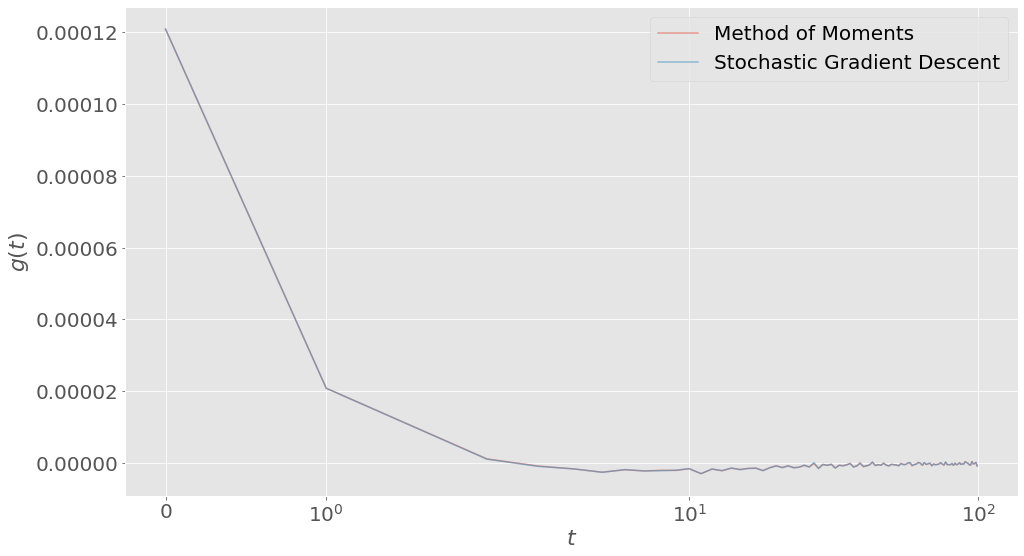

In [5]:
x = np.arange(0, n)
y_1 = model_moments.parameters
y_2 = model_sgd.parameters

plt.xscale('symlog')
plt.xlabel('$t$', fontsize=22)
plt.ylabel('$g(t)$', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x, y_1, alpha=.5)
plt.plot(x, y_2, alpha=.5)
plt.legend(['Method of Moments', 'Stochastic Gradient Descent'], fontsize=20)

plt.savefig('tim1_params')
plt.plot()

In [6]:
model_moments.score(s[-5:], r[-5:])

0.18866663602567801

In [7]:
model_sgd.score(s[-5:], r[-5:])

0.18850244232380675

In [8]:
params_count = []
r2 = []

for n in np.arange(2, 1001, 2):
    model_moments = TIM1(n=n, method='moments')
    model_moments.fit(s[:-5], r[:-5])
    params_count.append(n)
    r2.append(model_moments.score(s[-5:], r[-5:]))

[]

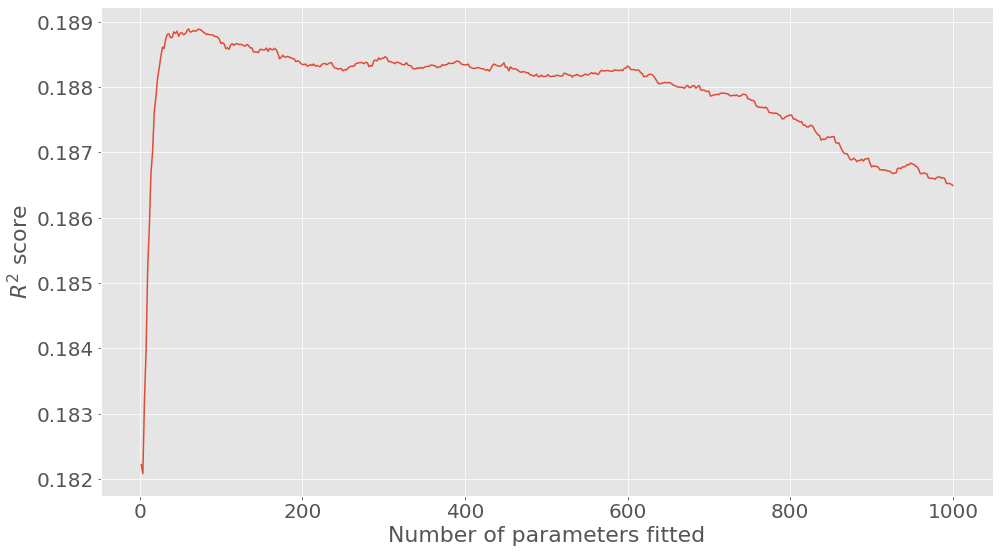

In [9]:
plt.plot(params_count, r2)

plt.xlabel('Number of parameters fitted', fontsize=22)
plt.ylabel('$R^2$ score', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('tim1_scores')
plt.plot()

In [10]:
params_count[np.argmax(r2)]

60

In [11]:
r2[np.argmax(r2)]

0.18889191268005368